# Sentinel-2 data download

In [2]:
import sentinelsat
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt, make_path_filter
from pathlib import Path
from datetime import date
import geopandas as gpd
from IPython.display import display
import matplotlib.pyplot as plt


print('All libraries successfully imported!')
print(f'sentinelsat : {sentinelsat.__version__}')

All libraries successfully imported!
sentinelsat : 1.1.0


## Set directory

In [3]:
computer_path = '/export/miro/ndeffense/LBRAT2104/'
grp_letter    = 'X'

# Directory for all work files
work_path = f'{computer_path}GROUP_{grp_letter}/WORK/'

roi_path = f'{work_path}ROI/'
dwl_path = f'{work_path}DOWNLOAD/'

Path(dwl_path).mkdir(parents=True, exist_ok=True)

## Authentification to Copernicus Open Access Hub

The Copernicus Open Access Hub and probably most Data Hubs require authentication.

You can provide your credentials with **SentinelAPI(your username , your password)**

In [4]:
user     = 'ndeffense'
password = 'lbrat2104'

# Connect to the API
api = SentinelAPI(user, password, 'https://apihub.copernicus.eu/apihub')

## Set region of interest

### 1. Open ROI shapefile

In [5]:
crs_dst = 'EPSG:32631'

roi_name     = 'extent_roi'
roi_filename = f'{roi_name}_{crs_dst[5:]}.shp'
roi_file     = f'{roi_path}{roi_filename}'

roi_gdf = gpd.read_file(roi_file)

print(f'ROI shapefile : {roi_file}')

ROI shapefile : /export/miro/ndeffense/LBRAT2104/GROUP_X/WORK/ROI/extent_roi_32631.shp


### 2. Reproject to WGS 84 if necessary


In [6]:
if roi_gdf.crs != 'epsg:4326':
    print(f'Old CRS : {roi_gdf.crs}')
    
    roi_gdf = roi_gdf.to_crs('epsg:4326')

    print((f'New CRS : {roi_gdf.crs}'))

Old CRS : epsg:32631
New CRS : epsg:4326


### 3. Save ROI (WGS 84) as GeoJSON file


In [7]:
roi_file_json = f'{roi_path}{roi_name}_4326.geojson'

roi_gdf.to_file(roi_file_json, driver='GeoJSON')

print(f'ROI GeoJSON file : {roi_file_json}')

ROI GeoJSON file : /export/miro/ndeffense/LBRAT2104/GROUP_X/WORK/ROI/extent_roi_4326.geojson


### 4. Set footprint

In [8]:
footprint = geojson_to_wkt(read_geojson(roi_file_json))

footprint

'GEOMETRYCOLLECTION(POLYGON((4.1899 50.4304,4.1975 50.7301,4.9988 50.7191,4.9861 50.4195,4.1899 50.4304)))'

## Set period of interest

In [9]:
# Year, Month, Day

start_date = date(2021, 10, 1)
end_date   = date(2021, 11, 30)

period = (start_date, end_date)

## Set cloud cover

To avoid downloading too cloudy images

In [10]:
min_pc_cloud = 0
max_pc_cloud = 75

cloud_range = (min_pc_cloud, max_pc_cloud)

## Set product type

Choose between Level-1C (*S2MSI1C*) or Level-2A (*S2MSI2A*)

In [11]:
#product_type = 'S2MSI1C'
product_type = 'S2MSI2A'

## Search by polygon, time, and SciHub query keywords

In [12]:
products = api.query(footprint,
                    date = period,
                    platformname = 'Sentinel-2',
                    producttype = product_type,
                    cloudcoverpercentage = cloud_range)

# Convert to pandas DataFrame

gdf = api.to_geodataframe(products)

display(gdf.head())

,title,link,link_alternative,link_icon,summary,ondemand,generationdate,beginposition,endposition,ingestiondate,...,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid,geometry
cb702f82-efcb-4a53-8a3c-73270742a73c,S2B_MSIL2A_20211126T105309_N0301_R051_T31UER_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-11-26T10:53:09.024Z, Instrument: MS...",false,2021-11-26 12:59:46,2021-11-26 10:53:09.024,2021-11-26 10:53:09.024,2021-11-26 17:55:41.179,...,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_VGS4_20211126T125946_S2021...,S2B_OPER_MSI_L2A_TL_VGS4_20211126T125946_A0246...,S2B_MSIL2A_20211126T105309_N0301_R051_T31UER_2...,cb702f82-efcb-4a53-8a3c-73270742a73c,"MULTIPOLYGON (((4.51786 49.55480, 4.54933 50.5..."
8969e1e5-f684-473a-8e6e-ad364ad1fb2c,S2B_MSIL2A_20211123T104249_N0301_R008_T31UFR_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-11-23T10:42:49.025Z, Instrument: MS...",false,2021-11-23 12:23:13,2021-11-23 10:42:49.025,2021-11-23 10:42:49.025,2021-11-23 17:25:30.667,...,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_VGS4_20211123T122313_S2021...,S2B_OPER_MSI_L2A_TL_VGS4_20211123T122313_A0246...,S2B_MSIL2A_20211123T104249_N0301_R008_T31UFR_2...,8969e1e5-f684-473a-8e6e-ad364ad1fb2c,"MULTIPOLYGON (((5.89936 49.52842, 5.95939 50.5..."
8e139b03-ce17-4219-a0db-2caa25b5b867,S2B_MSIL2A_20211123T104249_N0301_R008_T31UER_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-11-23T10:42:49.025Z, Instrument: MS...",false,2021-11-23 12:23:13,2021-11-23 10:42:49.025,2021-11-23 10:42:49.025,2021-11-23 17:14:47.770,...,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_VGS4_20211123T122313_S2021...,S2B_OPER_MSI_L2A_TL_VGS4_20211123T122313_A0246...,S2B_MSIL2A_20211123T104249_N0301_R008_T31UER_2...,8e139b03-ce17-4219-a0db-2caa25b5b867,"MULTIPOLYGON (((4.51786 49.55480, 4.54933 50.5..."
2f426423-9bb1-430e-b4fd-d3e62d67cbec,S2A_MSIL2A_20211121T105341_N0301_R051_T31UES_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-11-21T10:53:41.024Z, Instrument: MS...",false,2021-11-21 13:52:06,2021-11-21 10:53:41.024,2021-11-21 10:53:41.024,2021-11-21 17:13:13.458,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_VGS2_20211121T135206_S2021...,S2A_OPER_MSI_L2A_TL_VGS2_20211121T135206_A0335...,S2A_MSIL2A_20211121T105341_N0301_R051_T31UES_2...,2f426423-9bb1-430e-b4fd-d3e62d67cbec,"MULTIPOLYGON (((4.54644 50.45352, 4.57954 51.4..."
4164f982-e812-4cd9-a11f-0bfdae73b3a7,S2A_MSIL2A_20211118T104331_N0301_R008_T31UES_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2021-11-18T10:43:31.024Z, Instrument: MS...",false,2021-11-18 13:32:11,2021-11-18 10:43:31.024,2021-11-18 10:43:31.024,2021-11-18 15:41:46.536,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_VGS2_20211118T133211_S2021...,S2A_OPER_MSI_L2A_TL_VGS2_20211118T133211_A0334...,S2A_MSIL2A_20211118T104331_N0301_R008_T31UES_2...,4164f982-e812-4cd9-a11f-0bfdae73b3a7,"MULTIPOLYGON (((4.54644 50.45352, 4.57954 51.4..."


## Plot footprint of the products

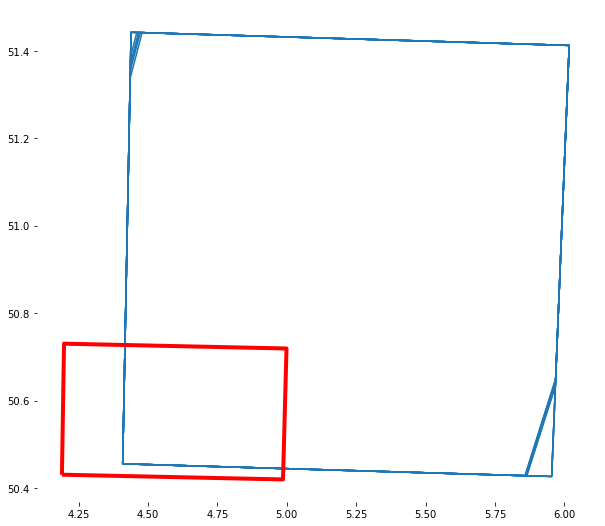

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

gdf.boundary.plot(ax=ax)

roi_gdf.boundary.plot(color='red', linewidth = 4, ax=ax)

plt.box(False)

## Select products of a specific Sentinel-2 tile

In [18]:
s2_tile = '31UFS'

gdf = gdf[gdf['title'].str.contains(s2_tile)]

gdf = gdf.sort_values('ingestiondate', ascending=True)

display(gdf['title'].to_list())


['S2B_MSIL2A_20211004T103809_N0301_R008_T31UFS_20211004T134409',
 'S2B_MSIL2A_20211007T104829_N0301_R051_T31UFS_20211007T141822',
 'S2A_MSIL2A_20211009T103941_N0301_R008_T31UFS_20211009T134536',
 'S2A_MSIL2A_20211012T105011_N0301_R051_T31UFS_20211012T140548',
 'S2A_MSIL2A_20211022T105111_N0301_R051_T31UFS_20211022T140322',
 'S2B_MSIL2A_20211024T104029_N0301_R008_T31UFS_20211024T122748',
 'S2B_MSIL2A_20211027T105049_N0301_R051_T31UFS_20211027T131047',
 'S2A_MSIL2A_20211029T104151_N0301_R008_T31UFS_20211029T134258',
 'S2A_MSIL2A_20211101T105211_N0301_R051_T31UFS_20211101T140418',
 'S2A_MSIL2A_20211111T105301_N0301_R051_T31UFS_20211111T135052',
 'S2A_MSIL2A_20211118T104331_N0301_R008_T31UFS_20211118T133211']

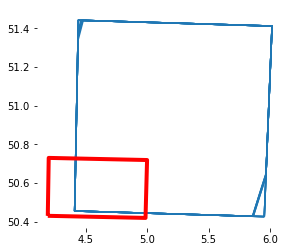

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

gdf.boundary.plot(ax=ax)

roi_gdf.boundary.plot(color='red', linewidth = 4, ax=ax)

plt.box(False)

## Download products

Copernicus Open Access Hub no longer stores all products online for immediate retrieval. Offline products can be requested from the Long Term Archive (LTA) and should become available within 24 hours. Copernicus Open Access Hub’s quota currently permits users to request an offline product every 30 minutes.

A product’s availability can be checked by using the `is_online()` convenience method.

The retrieval of offline products from the LTA can be triggered using trigger_offline_retrieval().

### Define the filter function to select files (to be excluded in this case)

In [ ]:
path_filter = make_path_filter("*60m.jp2", exclude=False)

In [40]:
for i, row in gdf[0:1].iterrows():

    product_id = row['uuid']

    is_online = api.is_online(product_id)

    if is_online:
        print(f'Product {product_id} is online. Starting download.')
        #api.download(product_id, directory_path=dwl_path, nodefilter=path_filter)
    else:
        print(f'Product {product_id} is not online.')
        api.trigger_offline_retrieval(product_id)

Product bd214fb6-6244-4968-a143-274e87711d68 is online. Starting download.
